In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms
import cv2 as cv
from model import Model

In [2]:
#features, labels = load_data_set(DIR='Resources/Faces/Patrik')
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    #transforms.Normalize((255, 255 , 255), (255, 255, 255),(255, 255, 255))
]) 

# Load images stored in different sub-folder corresponding to their class label
dataset = datasets.ImageFolder('Resources/Faces/Train', transform)
test_dataset = datasets.ImageFolder('Resources/Faces/Validation', transform)

In [3]:
classes = dataset.classes
print(classes)

['Happy', 'Normal', 'Sad', 'Surprised']


In [4]:
# create dataloader with batch_size=32
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Plot some images from the training set

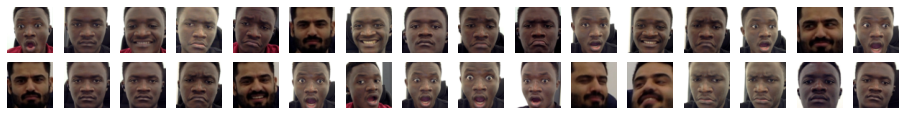

In [7]:
features, labels = next(iter(dataloader))
rows = int(len(features)/2) 
plt.figure(figsize=(16,16))
for i, (feature, label) in enumerate(zip(features, labels)):  
    plt.subplot(rows, rows, i+1)
    plt.axis("off")  
    plt.imshow(feature.permute(1, 2, 0).numpy(), cmap='gray')   


In [7]:
criteria = nn.CrossEntropyLoss()
model = Model().to(device)
lr = 0.001
n_epoch = 50
optimizer = Adam(model.parameters(), lr=lr)

### Train the model

In [8]:
for epoch in range(n_epoch):
    train_error = 0
    for i, (train_data, y_true) in enumerate(dataloader):
        optimizer.zero_grad() # reinitialize the gradient

        y_pred = model(train_data) # fit the data

        error = criteria(y_pred, y_true) # compute the error
        error.backward() # back propagrade the gradient
        optimizer.step() # Updates model parameters
        train_error += error.item()
    print(f'Epoch {epoch} train error {train_error/len(dataloader)}')

torch.save(model, 'Trained_Model')

Epoch 0 train error 0.91670400926045
Epoch 1 train error 0.23956719317606517
Epoch 2 train error 0.15328213535249233
Epoch 3 train error 0.10884071918470518
Epoch 4 train error 0.0913492222183517
Epoch 5 train error 0.058325406656201395
Epoch 6 train error 0.062466073382113664
Epoch 7 train error 0.04946045616109456
Epoch 8 train error 0.02552806448449181
Epoch 9 train error 0.015506754080498857
Epoch 10 train error 0.0124940983518692
Epoch 11 train error 0.013422241619056356
Epoch 12 train error 0.006383116634450354
Epoch 13 train error 0.004894536450488626
Epoch 14 train error 0.002617214630195771
Epoch 15 train error 0.0066422571777366105
Epoch 16 train error 0.0029661351352323045
Epoch 17 train error 0.007707128850493713
Epoch 18 train error 0.009228913368757016
Epoch 19 train error 0.005066600041131356
Epoch 20 train error 0.010387912286699117
Epoch 21 train error 0.0026562933603729885
Epoch 22 train error 0.02398287802898267
Epoch 23 train error 0.01500078423081764
Epoch 24 train

In [214]:
def check_accuracy(loader, model=model, is_training=False):
    model.eval()
    num_correct = 0 
    sample_size = 0
    with torch.no_grad():
        for img, label in loader:
            img = img.to(device)
            label = label.to(device)

            scores = model(img)
            _, predictions = scores.max(1) 
            num_correct += (predictions == label).sum()
            sample_size += predictions.shape[0] 
    print(f'{"Train" if is_training else "Test"} Correct classification {num_correct}/{sample_size} - accuracy {(num_correct/sample_size)*100:.2F}%')

In [215]:
check_accuracy(dataloader, model, True)
check_accuracy(test_dataloader, model)

Train Correct classification 1102/1102 - accuracy 100.00%
Test Correct classification 298/328 - accuracy 90.85%


In [186]:
def preprocess_image(image):
	# swap the color channels from BGR to RGB, resize it, and scale
	# the pixel values to [0, 1] range
	image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
	image = cv.resize(image, (64, 64))
	image = image.astype("float32") / 255.0
	# subtract ImageNet mean, divide by ImageNet standard deviation,
	# set "channels first" ordering, and add a batch dimension
	#image -= config.MEAN
	i#mage /= config.STD
	image = np.transpose(image, (2, 0, 1))
	image = np.expand_dims(image, 0)
	# return the preprocessed image
	return torch.from_numpy(image)

(282, 282, 3)


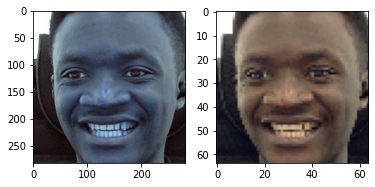

In [207]:
img = cv.imread(
    'Resources/Faces/Train/Happy/1632297411.6.jpg') 
print(img.shape) 
plt.subplot(121)
plt.imshow(img, cmap='gray') 
img_tensor = preprocess_image(img)  
plt.subplot(122)
plt.imshow(img_tensor[0].permute(1, 2, 0).numpy(), cmap='gray')
#plt.imshow(img_tensor[0], cmap='gray')

In [208]:
label = model.predict(img_tensor)
print(classes[label])

Happy
